# Dados e Aprendizagem Automática
### Part IV

## **Logistic Regression using Titanic Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

*Load the CSV - Titanic train*

In [3]:
train = pd.read_csv('DAA_datasets/titanic_train.csv')

**EDA**

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Missing Data**

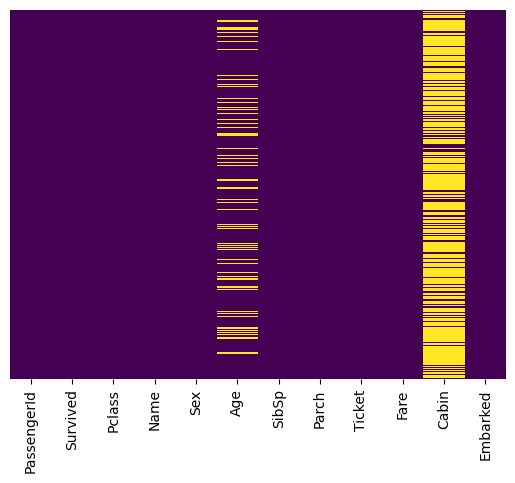

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

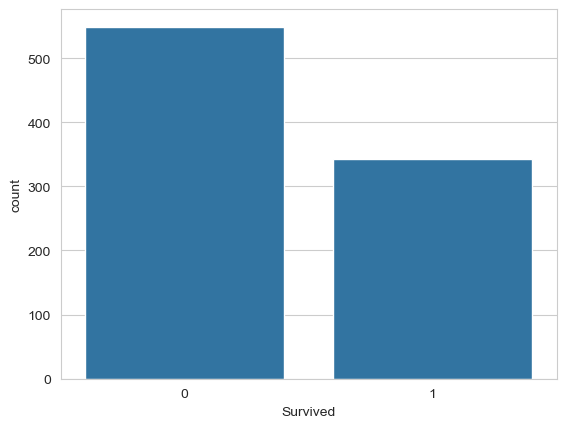

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)
plt.show()

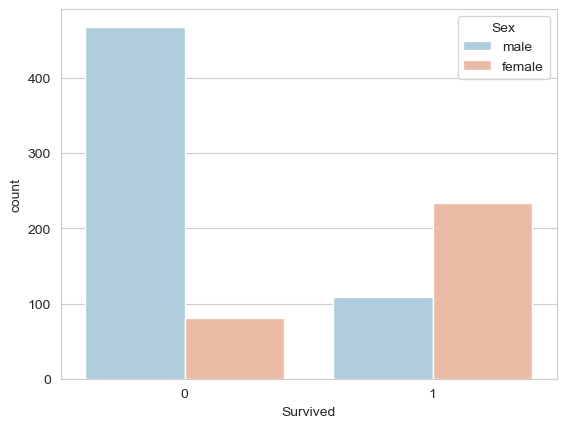

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train,palette='RdBu_r')
plt.show()

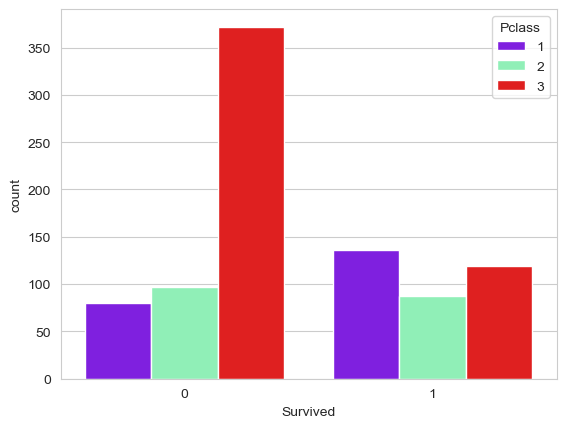

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.show()

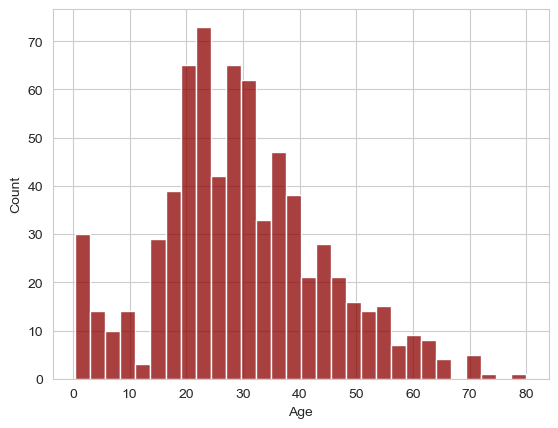

In [9]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

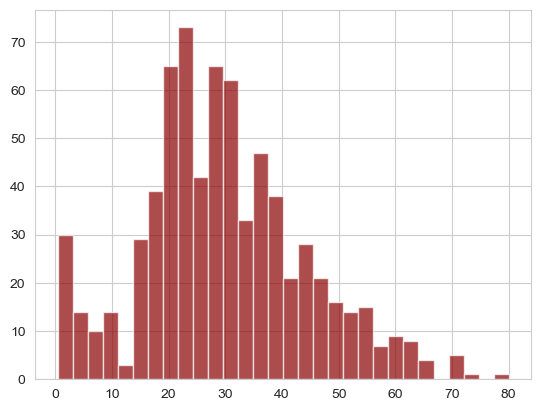

In [10]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)
plt.show()

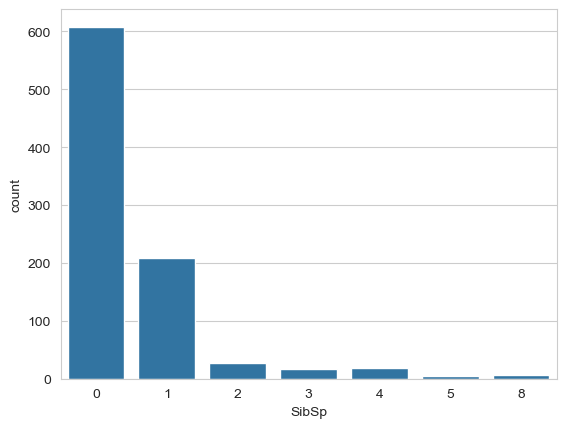

In [11]:
sns.countplot(x='SibSp', data=train)
plt.show()

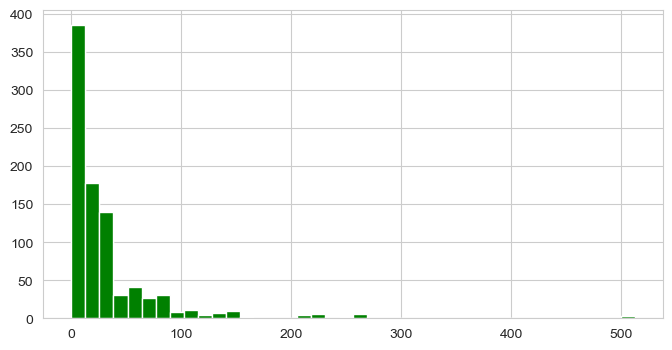

In [14]:
train['Fare'].hist(color='green',bins=40, figsize=(8,4))
plt.show()

**Data Cleaning**

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
            
        elif Pclass == 2:
            return 29

        else:
            return 24
            
    else:
        return Age

In [34]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/hl/pjymprws3hg6137tzbn8p6m00000gn/T/ipykernel_1729/2405339207.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/hl/pjymprws3hg6137tzbn8p6m00000gn/T/ipykernel_1729/2405339207.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [35]:
train.drop('Cabin',axis=1,inplace=True)

In [36]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [37]:
train.dropna(inplace=True)

Drop the <code>Cabin</code> column and the row in <code>Embarked</code> that is *NaN*:

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [39]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis=1,inplace=True)

In [22]:
train = pd.concat([train,sex,embark],axis=1)

In [40]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

**Logistic Regression Model**

In [41]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
y = train['Survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=101)

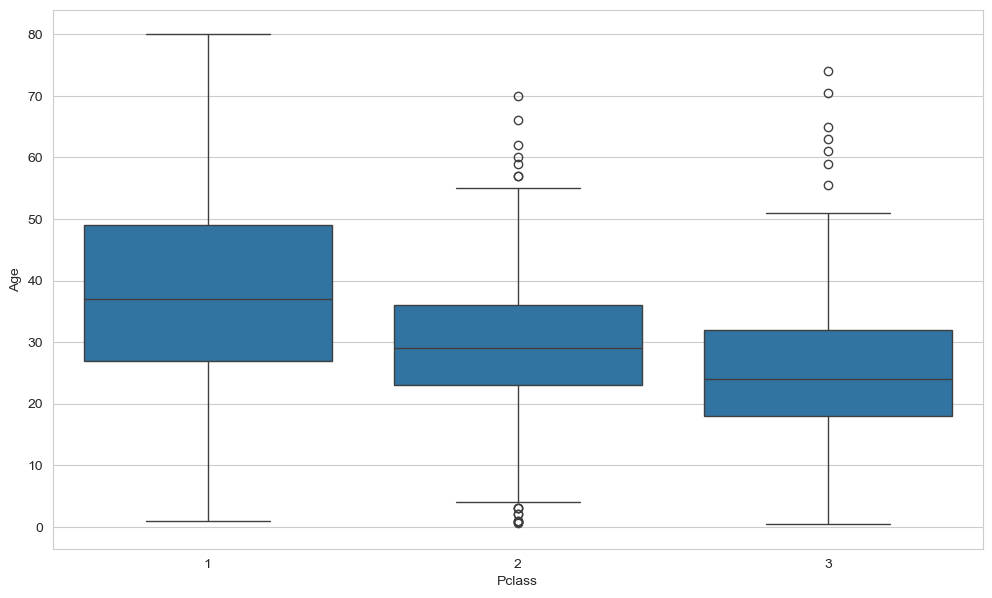

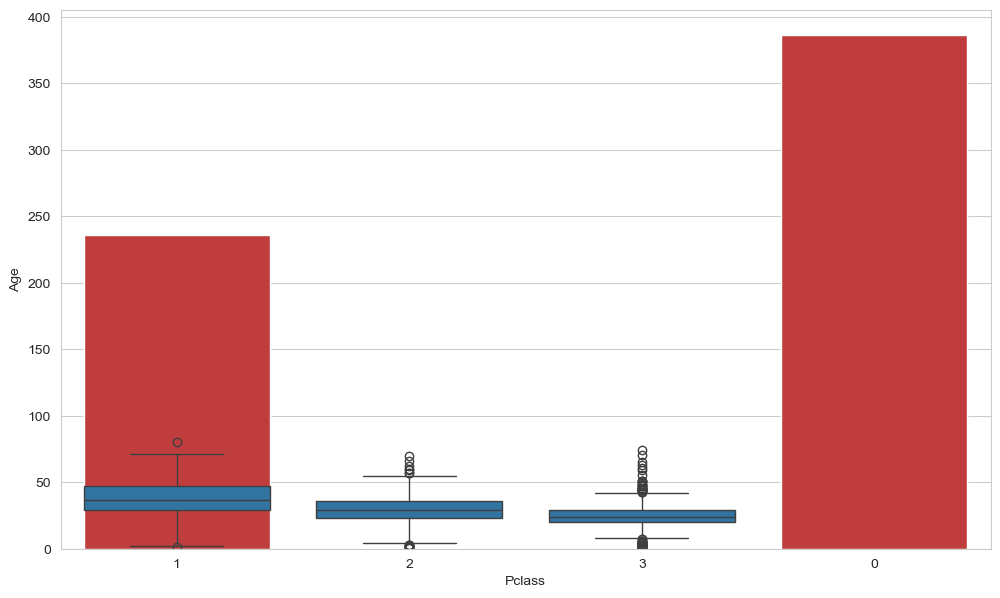

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = pd.DataFrame(y_train,columns=['Survived']))
plt.show()

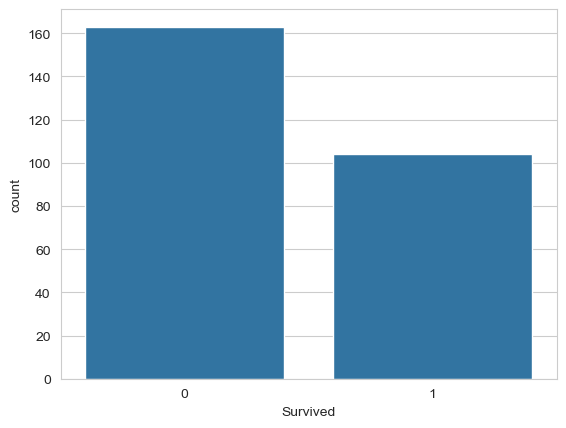

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = pd.DataFrame(y_test,columns=['Survived']))
plt.show()

<code>sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)</code>

LogisticRegression' **solvers**:

- Small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
- Multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
- ‘liblinear’ is limited to one-versus-rest schemes.

Supported **penalties** by solver:

- ‘newton-cg’ - [‘l2’, ‘none’]

- ‘lbfgs’ - [‘l2’, ‘none’]

- ‘liblinear’ - [‘l1’, ‘l2’]

- ‘sag’ - [‘l2’, ‘none’]

- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [50]:
from sklearn.linear_model import LogisticRegression

**logmodel1 - LogisticRegression(random_state=2022, solver='newton-cg')**

In [51]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.022299999999999542 seconds


In [52]:
predictions1 = logmodel1.predict(X_test)

**logmodel2 - LogisticRegression(random_state=2022, solver='lbfgs')**

In [53]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs', max_iter=800 )
print(logmodel2)
logmodel2.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(max_iter=800, random_state=2022)
Time spent: 0.022372999999999976 seconds


In [55]:
predictions2 = logmodel2.predict(X_test)

**logmodel3 - LogisticRegression(random_state=2022, solver='liblinear')**

In [56]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='liblinear')
Time spent: 0.013059999999999405 seconds


In [57]:
predictions3 = logmodel3.predict(X_test)

**Evaluation**

In [58]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [59]:
print("With 'newton-cg': \n", classification_report(y_test, predictions1))
print("With 'lbfgs': \n", classification_report(y_test, predictions2))
print("With 'liblinear': \n", classification_report(y_test, predictions3))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267

With 'liblinear': 
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       163
           1       0.72      0.46      0.56       104

    accuracy                           0.72       267
   macro avg       0.72      0.67      0.68       267
weighted avg      

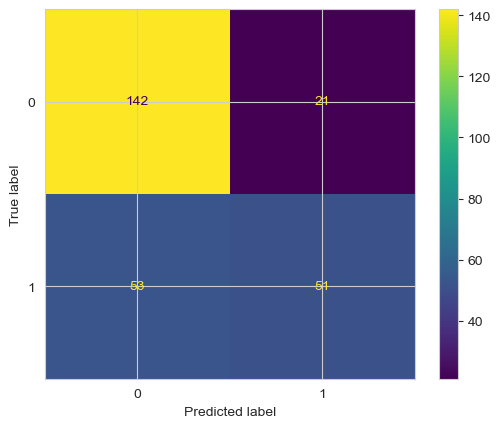

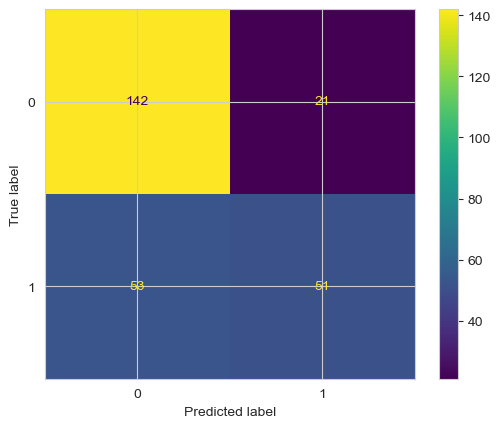

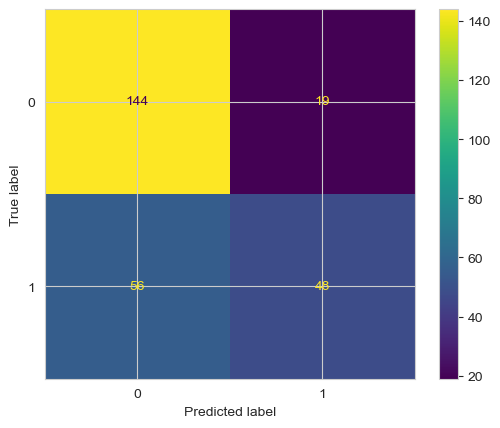

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions1)
ConfusionMatrixDisplay.from_predictions(y_test, predictions2)
ConfusionMatrixDisplay.from_predictions(y_test, predictions3)
plt.show()


Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?